# Investigating Medical Appointments With No-Show Patients

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will explore the No Show Medical Appointments dataset curated by Udacity/Kaggle.
> I downloaded the No-Show Appointments dataset and saved it as "nspa.csv".
> I also downloaded the Udacity's Jupyter Notebook Template and imported all the packages that will be used in the project.
> A few research questions (RQ) emerged through the end of the analyze of this dataset:
>
> 1) The age: does it have any kind of impact or relationship in terms of people showing up for medical appointments or not?
>
> 2) Age & Scholarship: The combination of both had impact or relationship in terms of people showing up for appointments or not?
>

### Importing Packages

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> Renamed the data from "noshowappointments-kagglev2-may-2016.csv." to "nspa.csv" (short for No Show Patient Appointments).
> Before reading the CSV file I verified if it was encoded in UTF-8 using the Notepad++ application. As It was encoded, I didn't did anything more in the wrangling step. 

### General Properties
> Load the data and save it to 'nspa'.
> The nspa dataframe is all the appointments, regardless of whether or not the person showed up or not.
>
> Print out the first few lines using .head().

In [17]:
nspa = pd.read_csv('nspa.csv', encoding='UTF-8')
nspa.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> After loading the data, I performed operations to inspect data types and look for instances of missing or possibly wrong data.
> The function used were describe. Describe helps to get an overview of the data from a statistical summary viewpoint.

In [18]:
nspa.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The next step is inspecting the data at a high level.
> The info function allows to see the different data types for each columns as well as number of rows in each one.
> This helps as a reference for null instances, column names, data types and row counts too and the histogram gives a high view of the data.

In [19]:
nspa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025378485F88>,
      dtype=object)

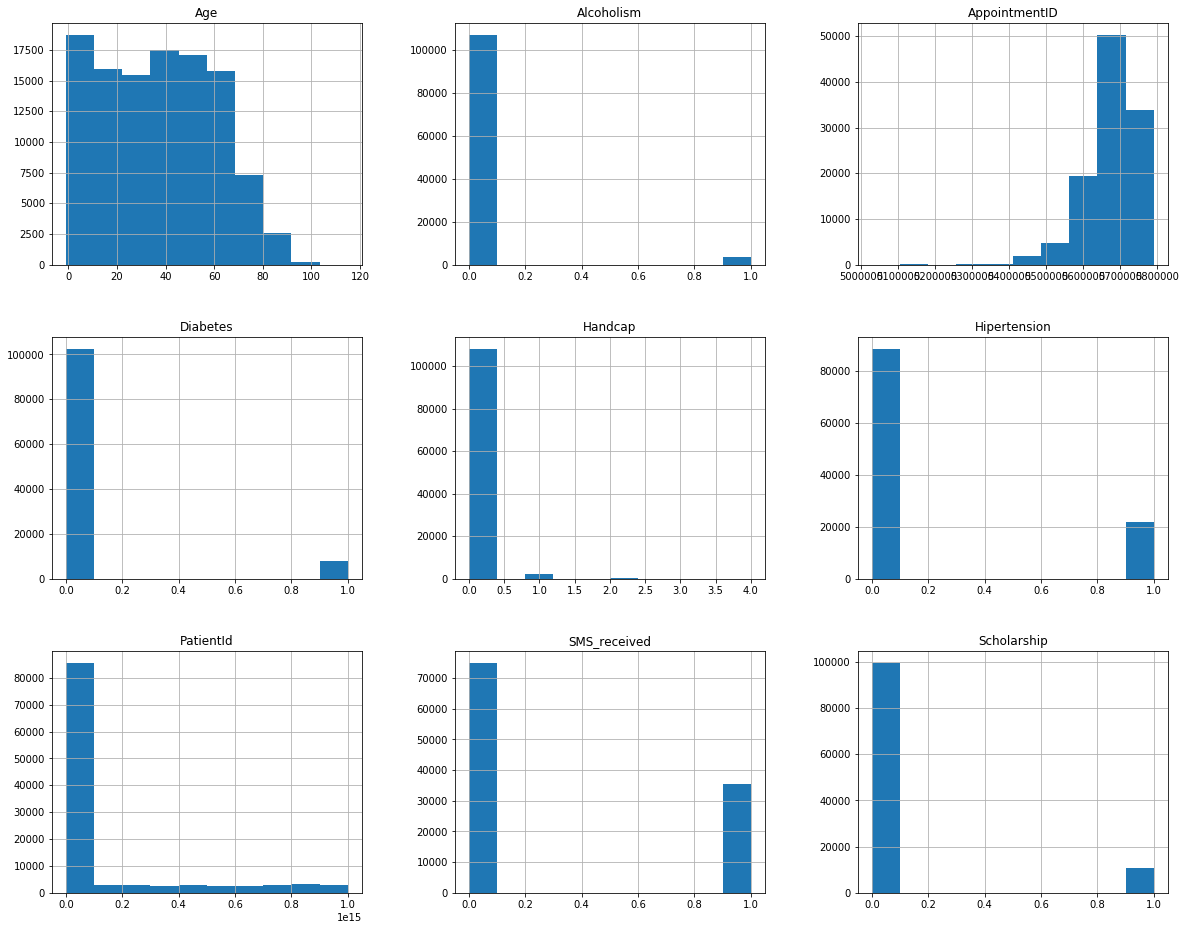

In [20]:
nspa.hist(figsize = (20,16))

### Data Cleaning

> In this step, I take a closer look at some specific aspects of the data.
> The first code in this section are looking into the maximum listed age == 115.
> Start creating a sub-group of 'nspa' dataset where the 'Age' column values are equal to '115' and then print the data.

In [21]:
max_age = nspa[nspa['Age'] == 115]
max_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


> Then, I'm gonna count the number of unique values in PatientId. It retrieves 2 people that are 115 years old.
> This is probably an error, given the fact that the oldest person in Brazil died in 2011 with 114 years old according to <a href = 'http://edition.cnn.com/2011/WORLD/americas/06/21/brazil.oldest.person.dies/'> CNN </a> but I'm not gonna change the data.

In [22]:
max_age['PatientId'].nunique()

2

> Before answering the research questions I cleaned the age error of -1 as is shown in the describe function.
> I'm gonna select all people that have this age and chage to 0, assuming this is a new born. Another possibility is delete the data from the people with age -1. 
> The line of code replaces in the Age column the values that are -1 and changes them to 0.

In [23]:
min_age = nspa[nspa['Age'] == -1]
nspa.Age.replace([-1],[0], inplace = True)

> Then I re-run the describe and info functions to see if any row was missed before starting the EDA process. The purpose of this step is to see if any data were lost during the data cleaning process.

In [24]:
nspa.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088883,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110190,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [25]:
nspa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> The data cleaning process ends here. Now I'm gonna start the EDA.

<a id='eda'></a>
## Exploratory Data Analysis

### RQ 1: 
### The age: does it have any kind of impact or relationship in terms of people showing up for medical appointments or not?

> To answer the question above I made a copy of the "nspa" dataset. The copy is named "rq_nspa".
>
> Using the 'rq_nspa' dataset, I'm gonna create a boxplot and use Age as the x-axis and "No-show" for the y-axis.
> palette=["b", "r"] sets the colors for the 2 categories, Yes and No. It says ‘No’ if the patient showed up to their            appointment, and ‘Yes’ if they did not show up.
> Then, save it to nspa_viz.

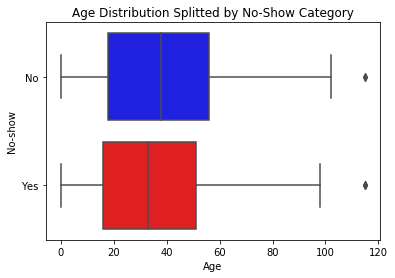

In [26]:
rq_nspa = nspa
nspa_viz = sns.boxplot(x="Age", y="No-show", palette=["b", "r"], data=rq_nspa).set_title(
    'Age Distribution Splitted by No-Show Category')

> The boxplot above shows that the people who did not show up for their medical appointments were younger than those who attended.
> This relation doesn't describe the detail that the number of people in "Yes" is about four times smaller than "No".
> I infer that if each group of the boxplot had closer or same instances that the "Yes" and "No" visuals would be more similar.
> The reason I choose boxplot was because it shows statistical 'outline' of the two groups.

### RQ 2:
### Age & Scholarship: The combination of both had impact or relationship in terms of people showing up for appointments or not?


> 
### The Age of Scholarship Recipients and Non-Recipients Splitted By the No-Show Category

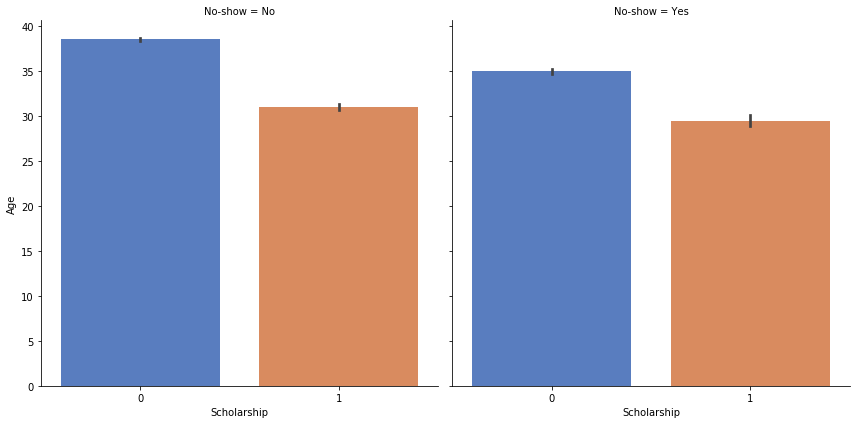

In [27]:
sns.catplot(x="Scholarship", y="Age", col="No-show", data=rq_nspa, height=6, kind="bar", palette="muted", )

> The barplot above shows that in the Yes group (didn't show up for an appointment) people
> who don't have scholarships (the 0 bar) were closer in age to those in the same group but did have scholarships (the 1 bar).
> In the No group, the age difference is noticeably much bigger.
> The people who do have scholarships in the "No" group were almost as young as the people with
> scholarships in the "Yes" group. It's an interesting relation because the "No" group has
> nearly four times more people than the "Yes" group.

<a id='conclusions'></a>
## Conclusions

> ***Results of the EDA:***
>
> In the given data there wasn't a huge difference in age for those who did or didn't show up to appointments.
> The difference would had been bigger if the group who did show up for appointments wasn't been nearly 4 times larger than the group of people who didn't show up for appointments.
> 
> The people who didn't show up to the medical appointments tended to be 
> younger and that is also the same for whether or not these 2 groups of people had healthcare scholarships. 
> This is possibly caused by the fact that the No-show = Yes group is about 4 times smaller than the No group.
> 
>An analysis of diabetes and hipertension would be interesting because these injuries often requires a close medical follow-up.
>
> Last but not least, after exploring and cleaning this dataset I don't believe there is definitive correlation that either 
> Age nor Scholarship status has an impact on whether or not a person shows up for their appointment or not. This is partly due to the fact that the number of people who did show up for appointments was nearly four times more
> than the number of people who didn't show up for appointments.
>
> ***Limitations of the EDA & Dataset***:
>
> The fact that Scholarship has only two possible answers (0 or 1) difficults in the plotting of good visualizations to provide better & easy to understand insights. 
>
> Some columns used categorical data. This made the analyze & visualyze process more difficult. Also, this hinders the ability to find any strong correlation between variables. 
>
> The last limitation relies on the unbalance split between the No-show Yes and No-show No groups did't allow for a truly balanced or equal analysis to be done but at the same time this uneven split showed some potentially interesting areas that could be further explored.